# Bézier Curve Drawing: Mathematical Foundations and Implementation

## Introduction

Bézier curves are parametric curves extensively used in computer graphics, CAD systems, and vector graphics. Named after French engineer Pierre Bézier, who developed them for automobile body design at Renault, these curves provide an intuitive way to define smooth curves using a set of control points.

## Mathematical Foundation

### Bernstein Basis Polynomials

Bézier curves are constructed using **Bernstein basis polynomials**. For a parameter $t \in [0, 1]$ and degree $n$, the $i$-th Bernstein polynomial is:

$$B_{i,n}(t) = \binom{n}{i} t^i (1-t)^{n-i}$$

where $\binom{n}{i} = \frac{n!}{i!(n-i)!}$ is the binomial coefficient.

### Bézier Curve Definition

Given $n+1$ control points $\mathbf{P}_0, \mathbf{P}_1, \ldots, \mathbf{P}_n$, the Bézier curve is defined as:

$$\mathbf{B}(t) = \sum_{i=0}^{n} B_{i,n}(t) \mathbf{P}_i = \sum_{i=0}^{n} \binom{n}{i} t^i (1-t)^{n-i} \mathbf{P}_i$$

### Common Bézier Curves

**Linear Bézier (n=1):**
$$\mathbf{B}(t) = (1-t)\mathbf{P}_0 + t\mathbf{P}_1$$

**Quadratic Bézier (n=2):**
$$\mathbf{B}(t) = (1-t)^2\mathbf{P}_0 + 2t(1-t)\mathbf{P}_1 + t^2\mathbf{P}_2$$

**Cubic Bézier (n=3):**
$$\mathbf{B}(t) = (1-t)^3\mathbf{P}_0 + 3t(1-t)^2\mathbf{P}_1 + 3t^2(1-t)\mathbf{P}_2 + t^3\mathbf{P}_3$$

### Key Properties

1. **Endpoint Interpolation:** $\mathbf{B}(0) = \mathbf{P}_0$ and $\mathbf{B}(1) = \mathbf{P}_n$
2. **Tangent Vectors:** The curve is tangent to $\mathbf{P}_1 - \mathbf{P}_0$ at $t=0$ and to $\mathbf{P}_n - \mathbf{P}_{n-1}$ at $t=1$
3. **Convex Hull:** The curve lies entirely within the convex hull of its control points
4. **Affine Invariance:** Transforming control points transforms the curve identically
5. **Partition of Unity:** $\sum_{i=0}^{n} B_{i,n}(t) = 1$ for all $t$

### De Casteljau's Algorithm

An elegant recursive algorithm for evaluating Bézier curves:

$$\mathbf{P}_i^{(r)}(t) = (1-t)\mathbf{P}_i^{(r-1)}(t) + t\mathbf{P}_{i+1}^{(r-1)}(t)$$

where $\mathbf{P}_i^{(0)} = \mathbf{P}_i$ and the final point $\mathbf{P}_0^{(n)}(t) = \mathbf{B}(t)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Set up matplotlib for high-quality output
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

## Implementation

### Bernstein Polynomial Evaluation

In [2]:
def bernstein_poly(i, n, t):
    """
    Compute the i-th Bernstein polynomial of degree n at parameter t.
    
    B_{i,n}(t) = C(n,i) * t^i * (1-t)^(n-i)
    
    Parameters:
    -----------
    i : int
        Index of the Bernstein polynomial (0 <= i <= n)
    n : int
        Degree of the polynomial
    t : array-like
        Parameter values in [0, 1]
    
    Returns:
    --------
    array-like
        Values of B_{i,n}(t)
    """
    return comb(n, i) * (t ** i) * ((1 - t) ** (n - i))


def bezier_curve(control_points, num_points=100):
    """
    Compute points on a Bézier curve using Bernstein polynomials.
    
    Parameters:
    -----------
    control_points : array-like, shape (n+1, 2)
        Control points defining the curve
    num_points : int
        Number of points to compute on the curve
    
    Returns:
    --------
    ndarray, shape (num_points, 2)
        Points on the Bézier curve
    """
    control_points = np.array(control_points)
    n = len(control_points) - 1
    t = np.linspace(0, 1, num_points)
    
    curve = np.zeros((num_points, 2))
    for i in range(n + 1):
        curve += np.outer(bernstein_poly(i, n, t), control_points[i])
    
    return curve

### De Casteljau's Algorithm Implementation

In [3]:
def de_casteljau(control_points, t):
    """
    Evaluate a point on a Bézier curve using de Casteljau's algorithm.
    
    This recursive algorithm is numerically more stable than direct
    Bernstein polynomial evaluation.
    
    Parameters:
    -----------
    control_points : array-like, shape (n+1, 2)
        Control points defining the curve
    t : float
        Parameter value in [0, 1]
    
    Returns:
    --------
    ndarray, shape (2,)
        Point on the curve at parameter t
    """
    points = np.array(control_points, dtype=float)
    n = len(points)
    
    for r in range(1, n):
        points = (1 - t) * points[:-1] + t * points[1:]
    
    return points[0]


def de_casteljau_curve(control_points, num_points=100):
    """
    Compute a Bézier curve using de Casteljau's algorithm.
    """
    t_values = np.linspace(0, 1, num_points)
    return np.array([de_casteljau(control_points, t) for t in t_values])

## Visualization of Bernstein Basis Polynomials

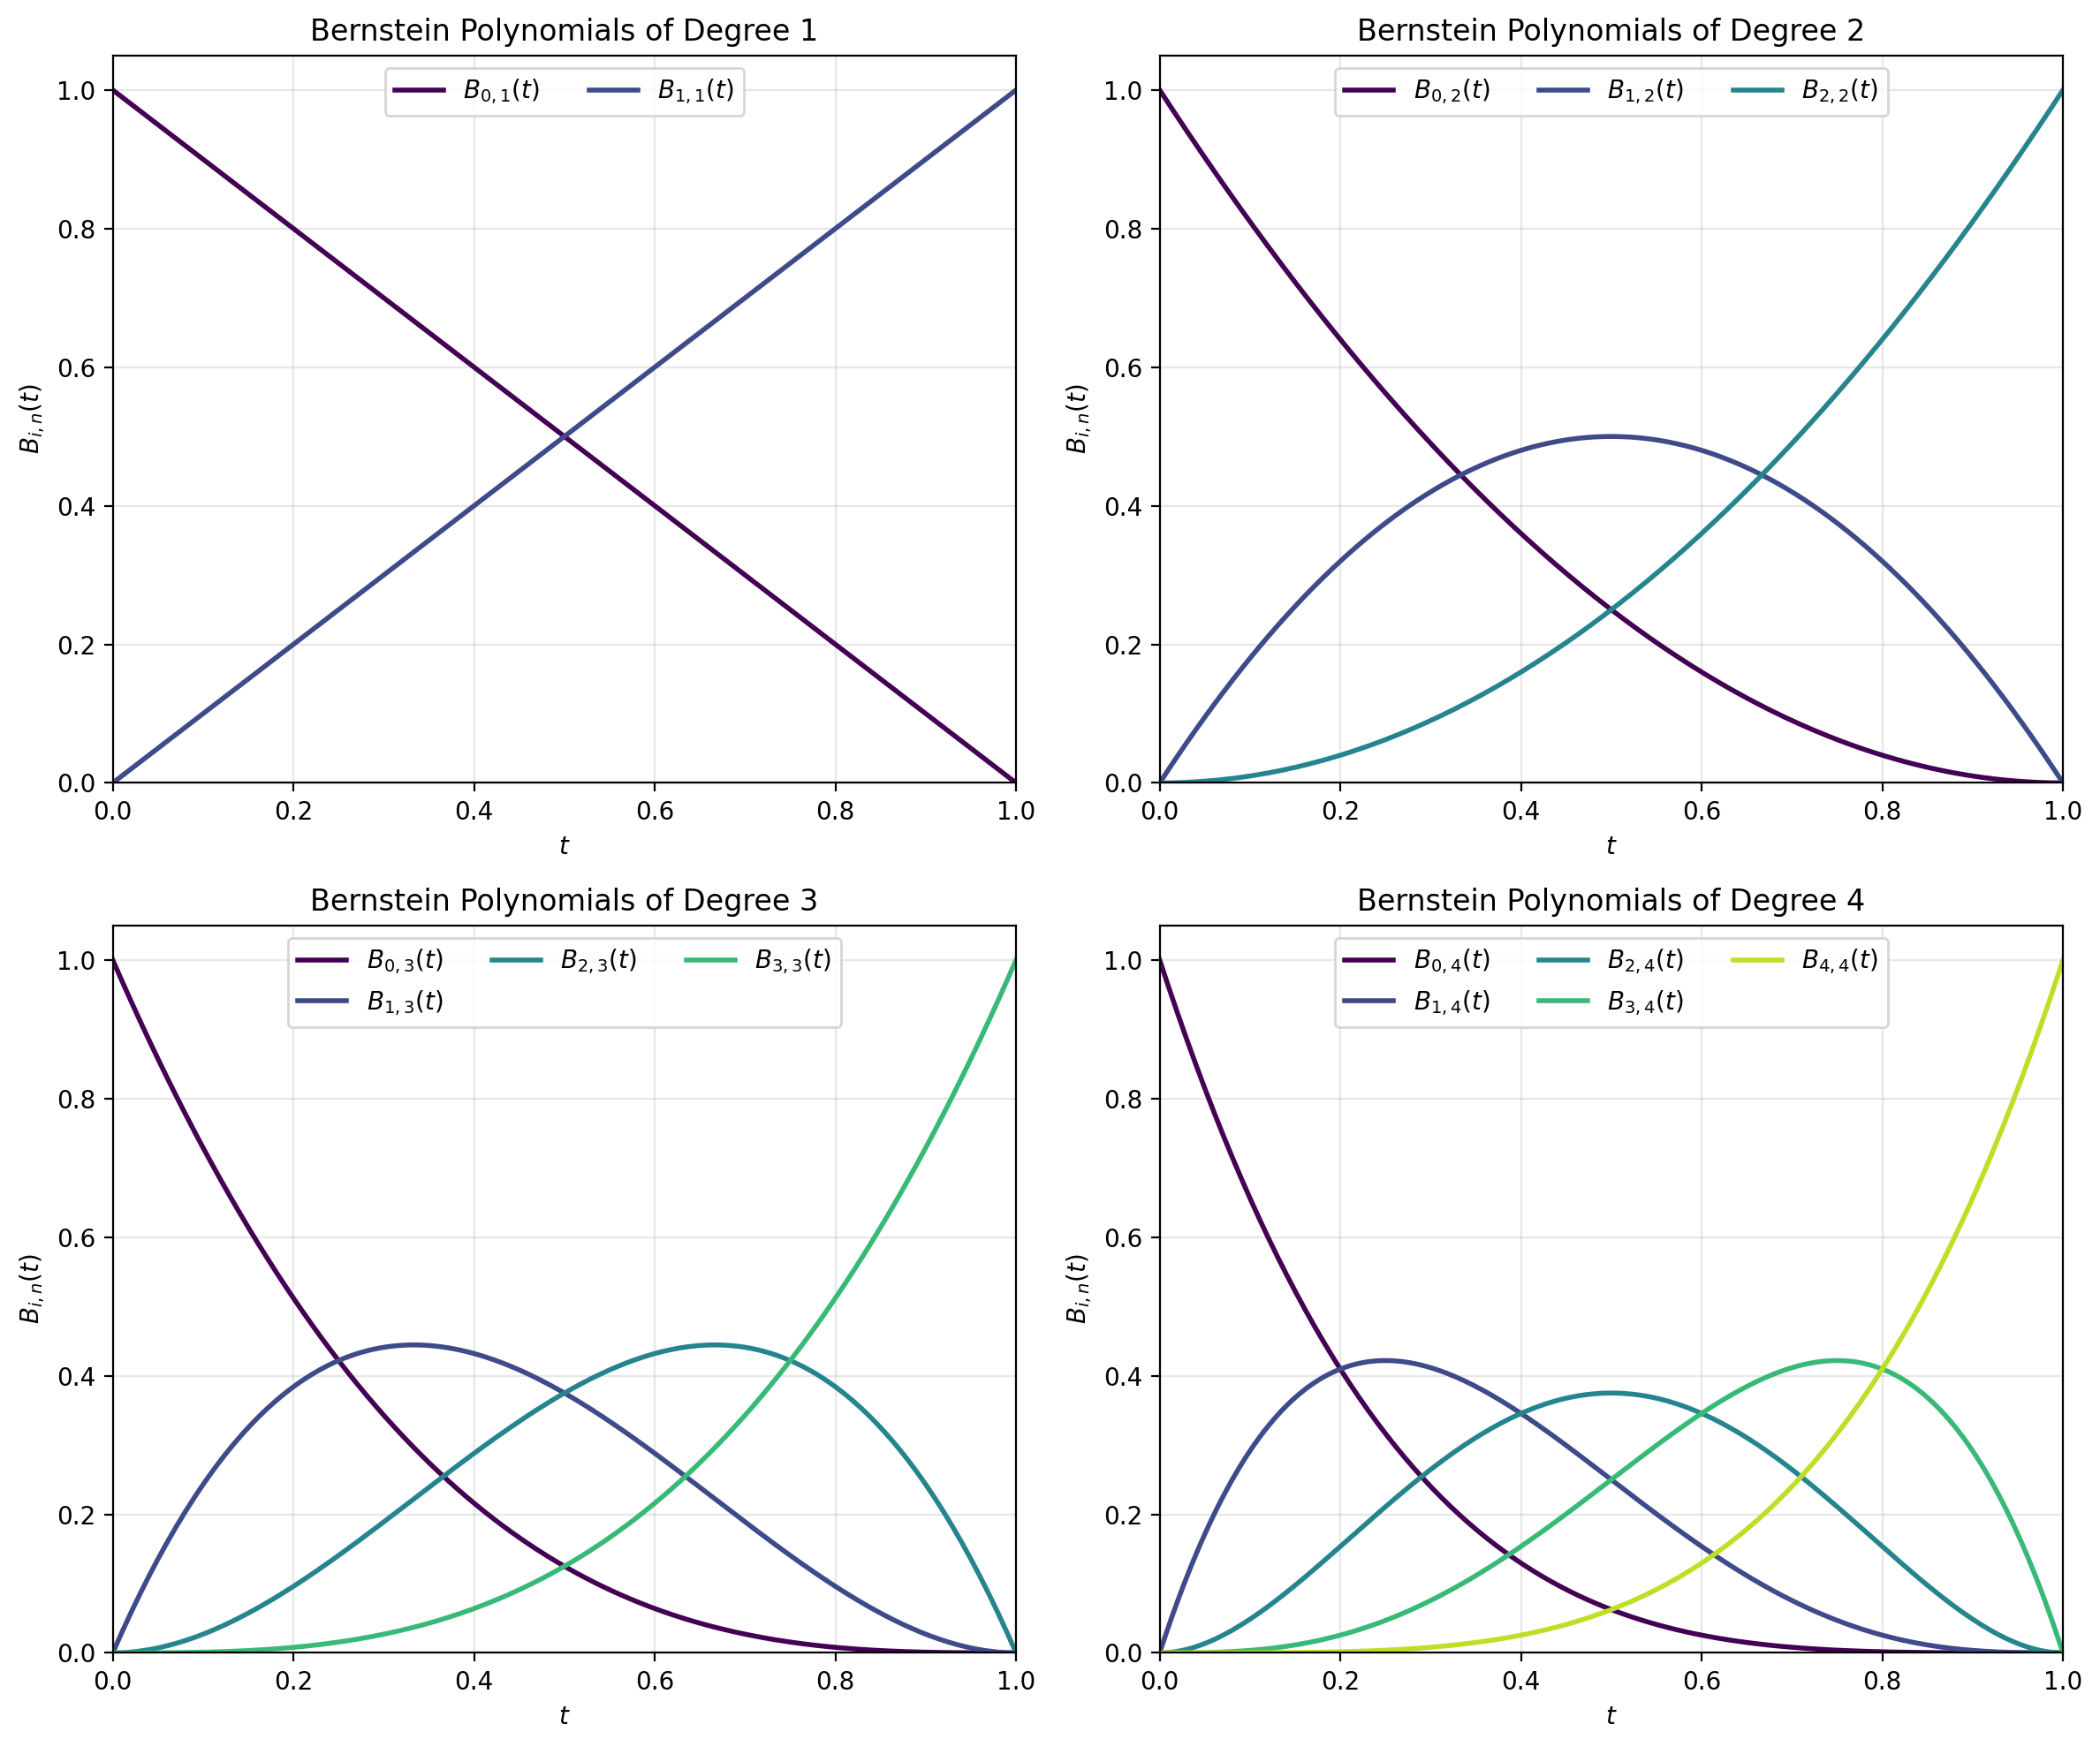

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

t = np.linspace(0, 1, 200)
colors = plt.cm.viridis(np.linspace(0, 0.9, 5))

for idx, n in enumerate([1, 2, 3, 4]):
    ax = axes[idx // 2, idx % 2]
    for i in range(n + 1):
        ax.plot(t, bernstein_poly(i, n, t), 
                label=f'$B_{{{i},{n}}}(t)$', 
                color=colors[i], 
                linewidth=2)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$B_{i,n}(t)$')
    ax.set_title(f'Bernstein Polynomials of Degree {n}')
    ax.legend(loc='upper center', ncol=min(3, n+1))
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

## Bézier Curves of Different Degrees

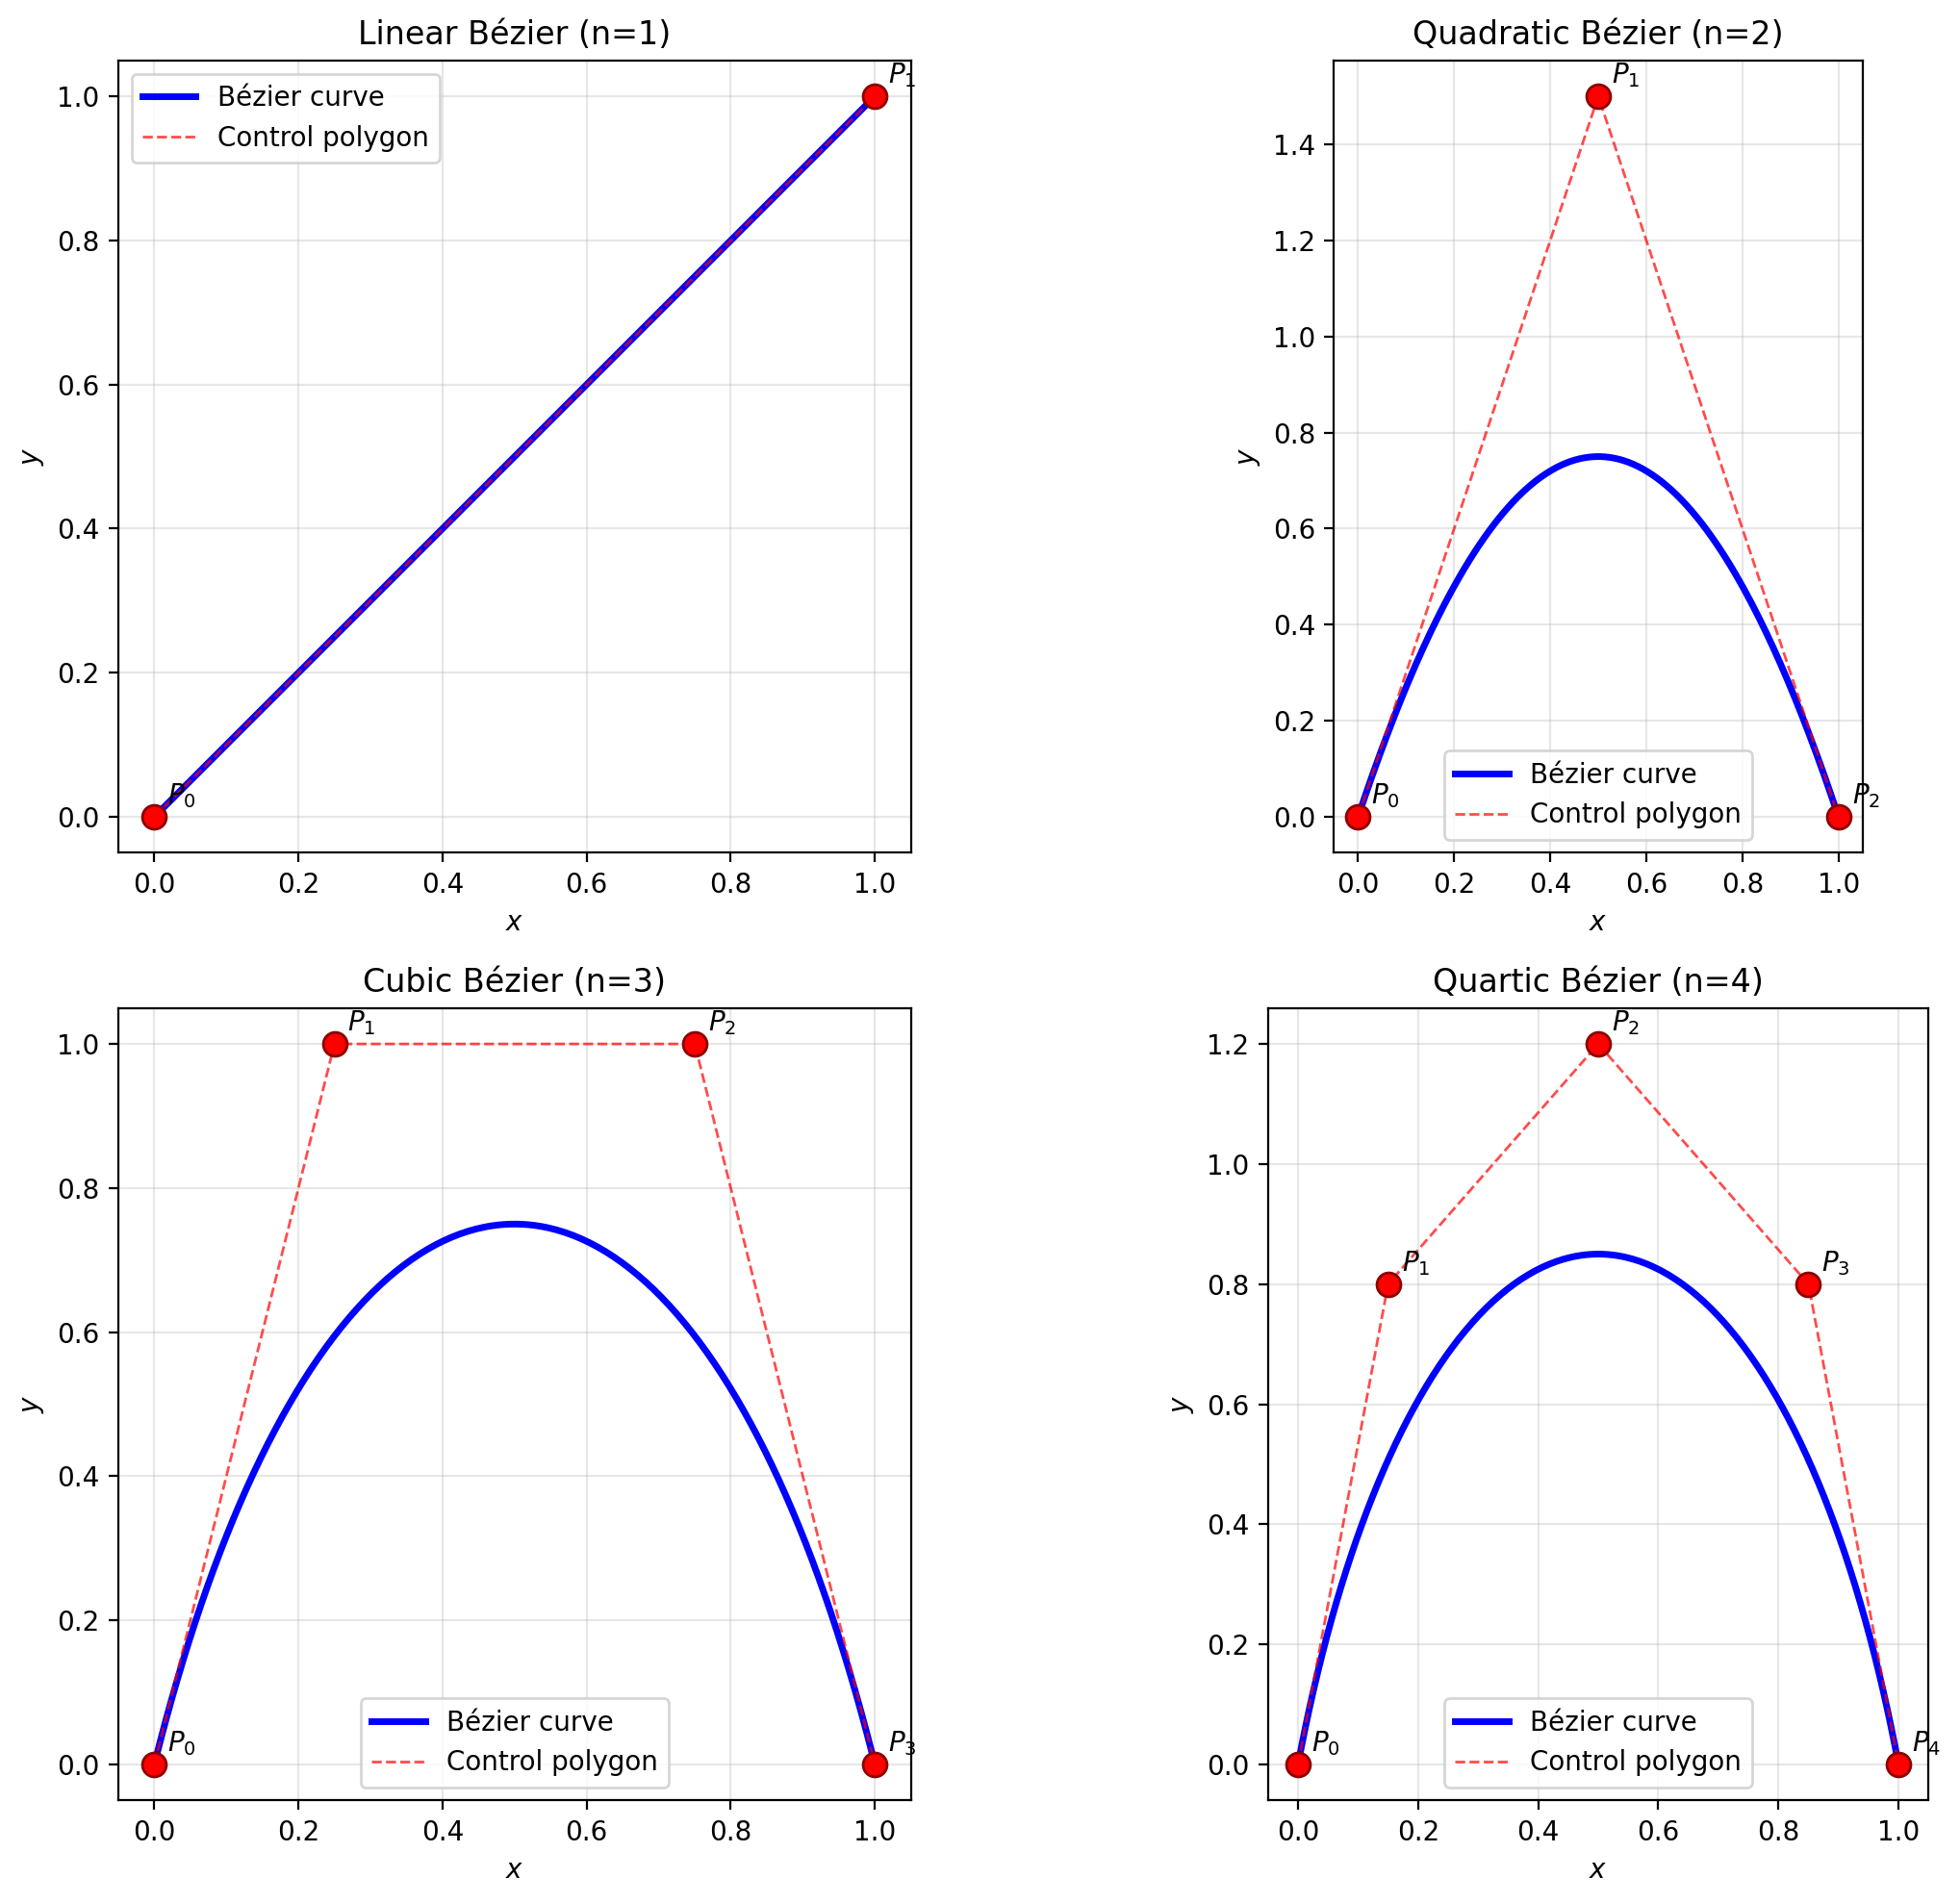

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define control points for different degree curves
control_points_sets = [
    # Linear (2 points)
    np.array([[0, 0], [1, 1]]),
    # Quadratic (3 points)
    np.array([[0, 0], [0.5, 1.5], [1, 0]]),
    # Cubic (4 points)
    np.array([[0, 0], [0.25, 1], [0.75, 1], [1, 0]]),
    # Quartic (5 points)
    np.array([[0, 0], [0.15, 0.8], [0.5, 1.2], [0.85, 0.8], [1, 0]])
]

titles = ['Linear Bézier (n=1)', 'Quadratic Bézier (n=2)', 
          'Cubic Bézier (n=3)', 'Quartic Bézier (n=4)']

for idx, (cp, title) in enumerate(zip(control_points_sets, titles)):
    ax = axes[idx // 2, idx % 2]
    
    # Compute and plot the curve
    curve = bezier_curve(cp, 200)
    ax.plot(curve[:, 0], curve[:, 1], 'b-', linewidth=2.5, label='Bézier curve')
    
    # Plot control polygon
    ax.plot(cp[:, 0], cp[:, 1], 'r--', linewidth=1, alpha=0.7, label='Control polygon')
    
    # Plot control points
    ax.scatter(cp[:, 0], cp[:, 1], c='red', s=80, zorder=5, edgecolors='darkred')
    
    # Label control points
    for i, point in enumerate(cp):
        ax.annotate(f'$P_{i}$', point, xytext=(5, 5), 
                   textcoords='offset points', fontsize=10)
    
    ax.set_title(title)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

## Visualizing De Casteljau's Algorithm

The de Casteljau algorithm progressively interpolates between control points. Let's visualize the intermediate construction for a cubic Bézier curve.

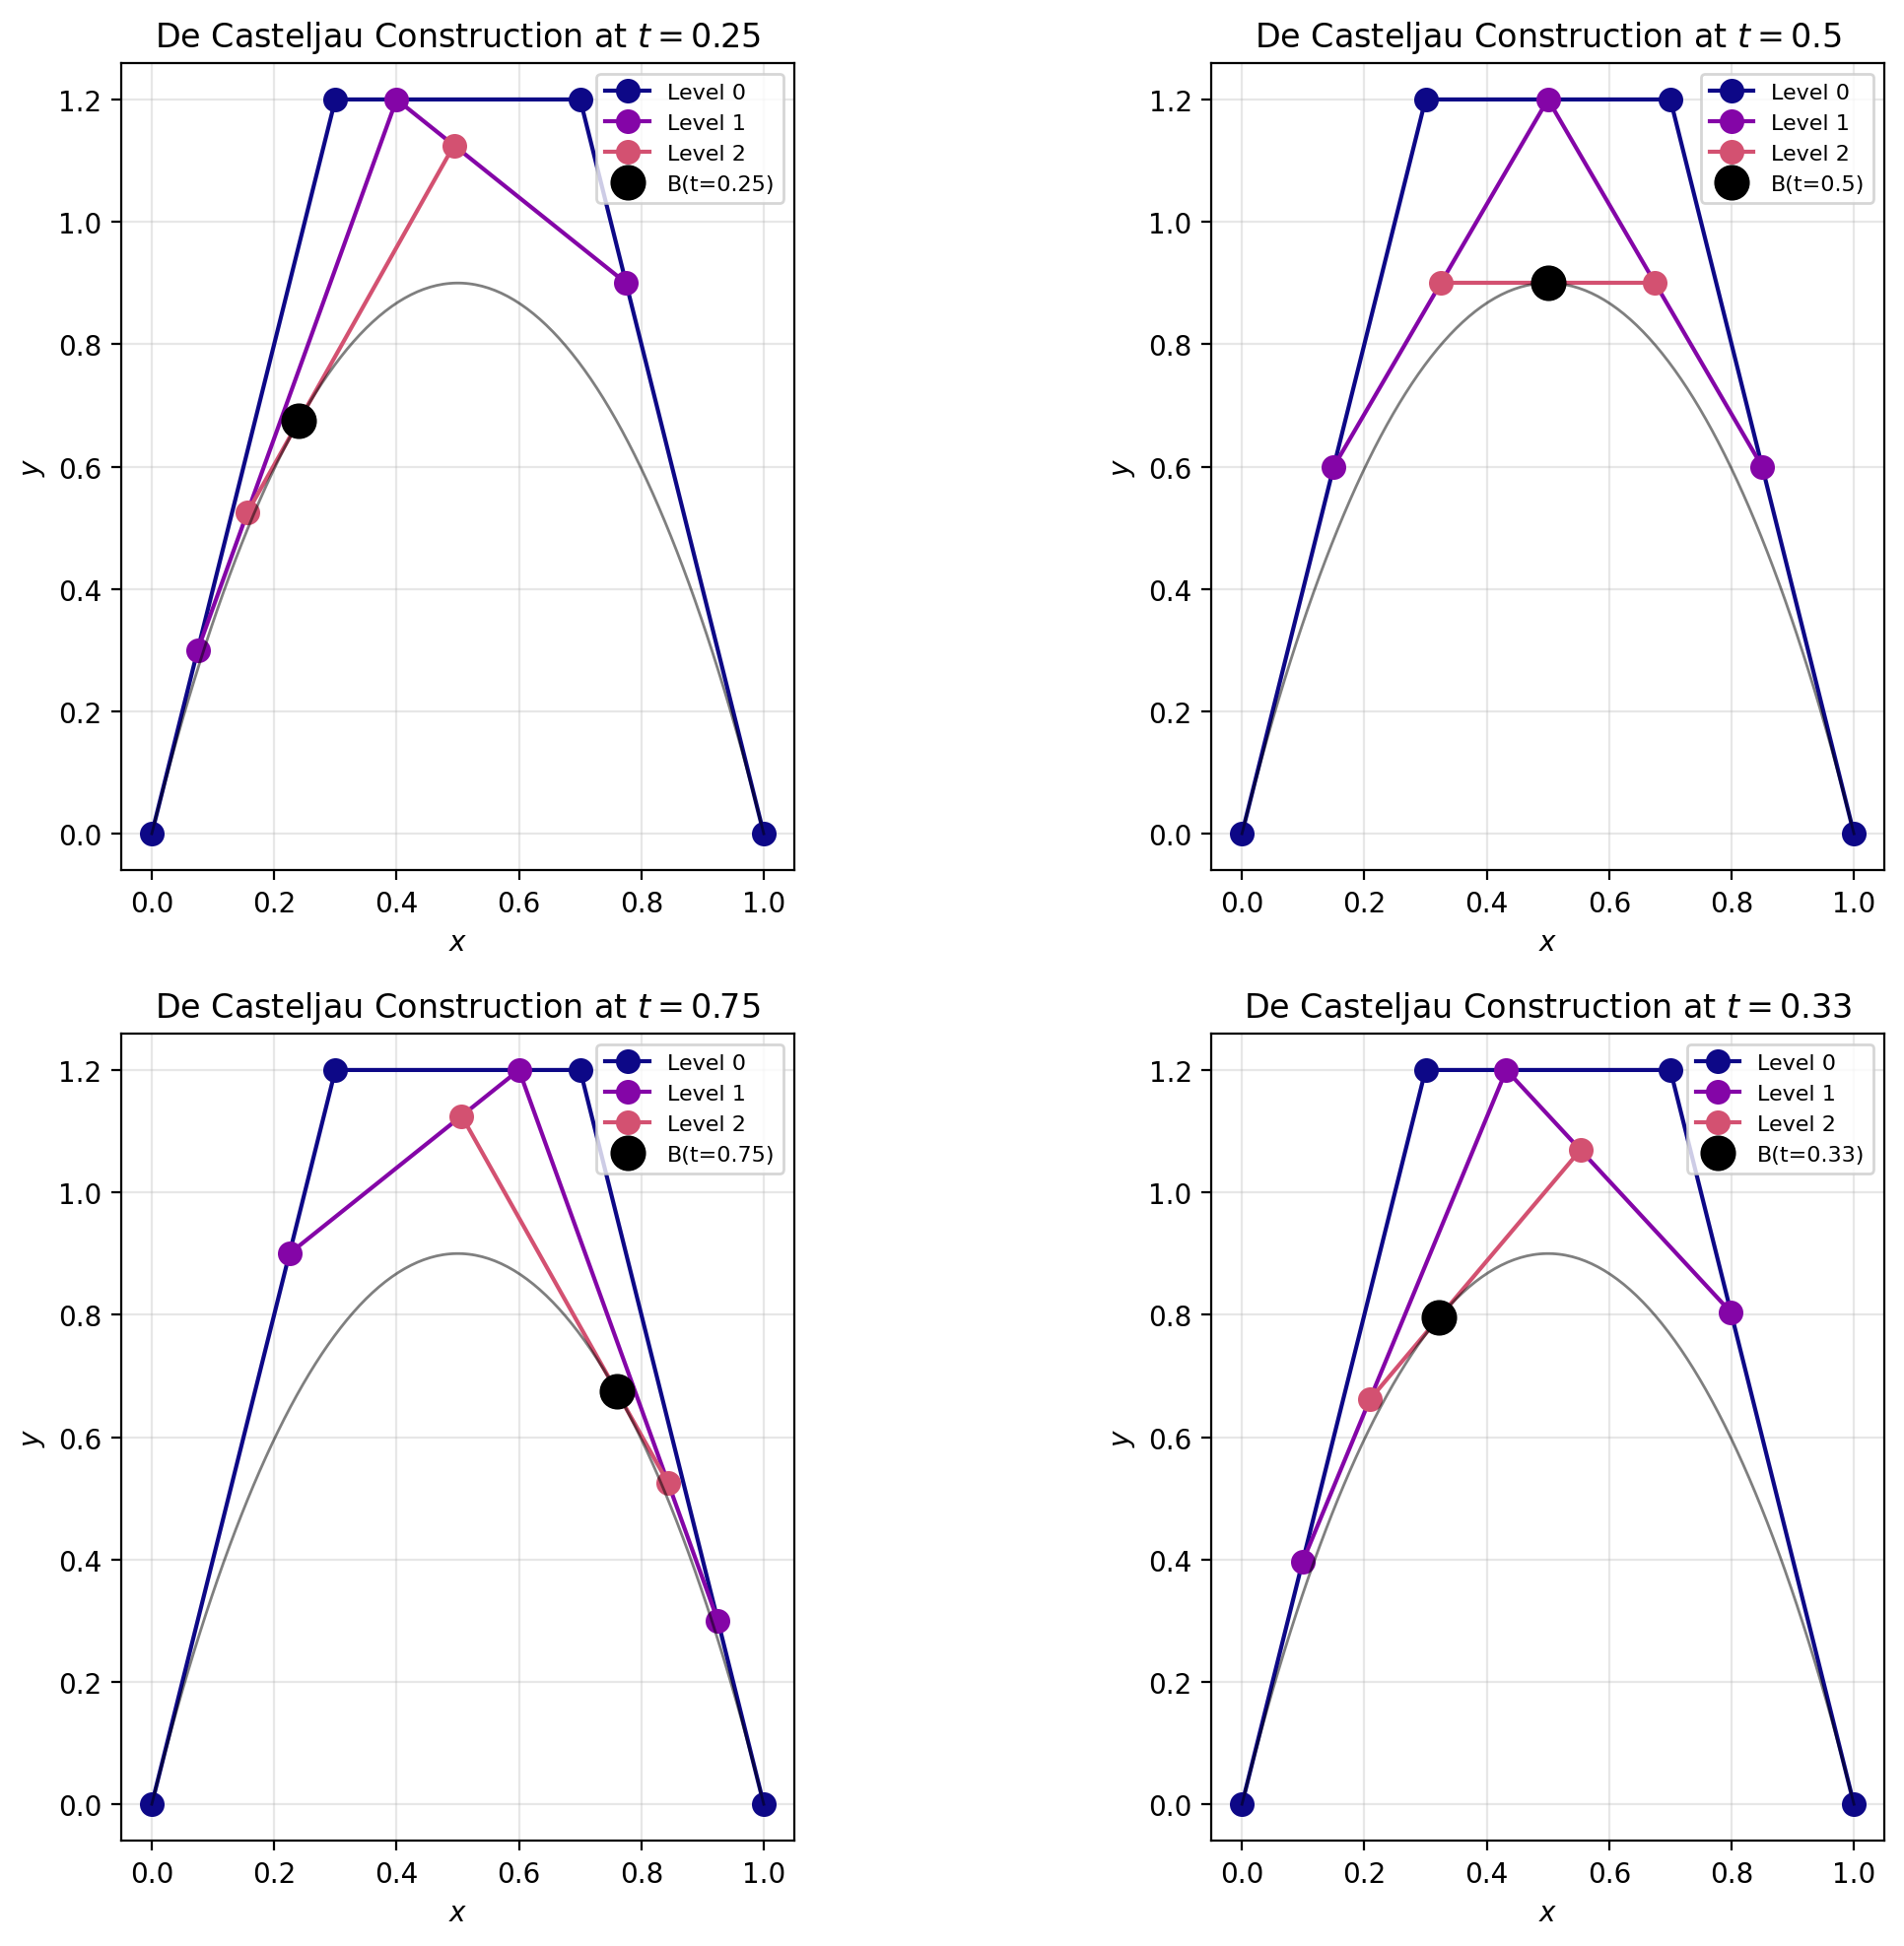

In [6]:
def visualize_de_casteljau(control_points, t, ax):
    """
    Visualize the de Casteljau algorithm at a specific parameter value.
    """
    points = np.array(control_points, dtype=float)
    n = len(points)
    
    colors = plt.cm.plasma(np.linspace(0, 0.8, n))
    
    # Store all intermediate points
    all_levels = [points.copy()]
    
    current_points = points.copy()
    for r in range(1, n):
        current_points = (1 - t) * current_points[:-1] + t * current_points[1:]
        all_levels.append(current_points.copy())
    
    # Plot each level
    for level, pts in enumerate(all_levels):
        if len(pts) > 1:
            ax.plot(pts[:, 0], pts[:, 1], 'o-', 
                   color=colors[level], 
                   markersize=8,
                   linewidth=1.5,
                   label=f'Level {level}')
        else:
            ax.plot(pts[0, 0], pts[0, 1], 'o', 
                   color='black', 
                   markersize=12,
                   label=f'B(t={t})')
    
    # Plot the full curve
    curve = bezier_curve(control_points, 200)
    ax.plot(curve[:, 0], curve[:, 1], 'k-', linewidth=1, alpha=0.5)
    
    return all_levels[-1][0]


# Cubic Bézier control points
cubic_cp = np.array([[0, 0], [0.3, 1.2], [0.7, 1.2], [1, 0]])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
t_values = [0.25, 0.5, 0.75, 0.33]

for ax, t in zip(axes.flat, t_values):
    visualize_de_casteljau(cubic_cp, t, ax)
    ax.set_title(f'De Casteljau Construction at $t = {t}$')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

## Effect of Control Point Manipulation

One of the key advantages of Bézier curves is intuitive control. Moving control points predictably affects the curve shape.

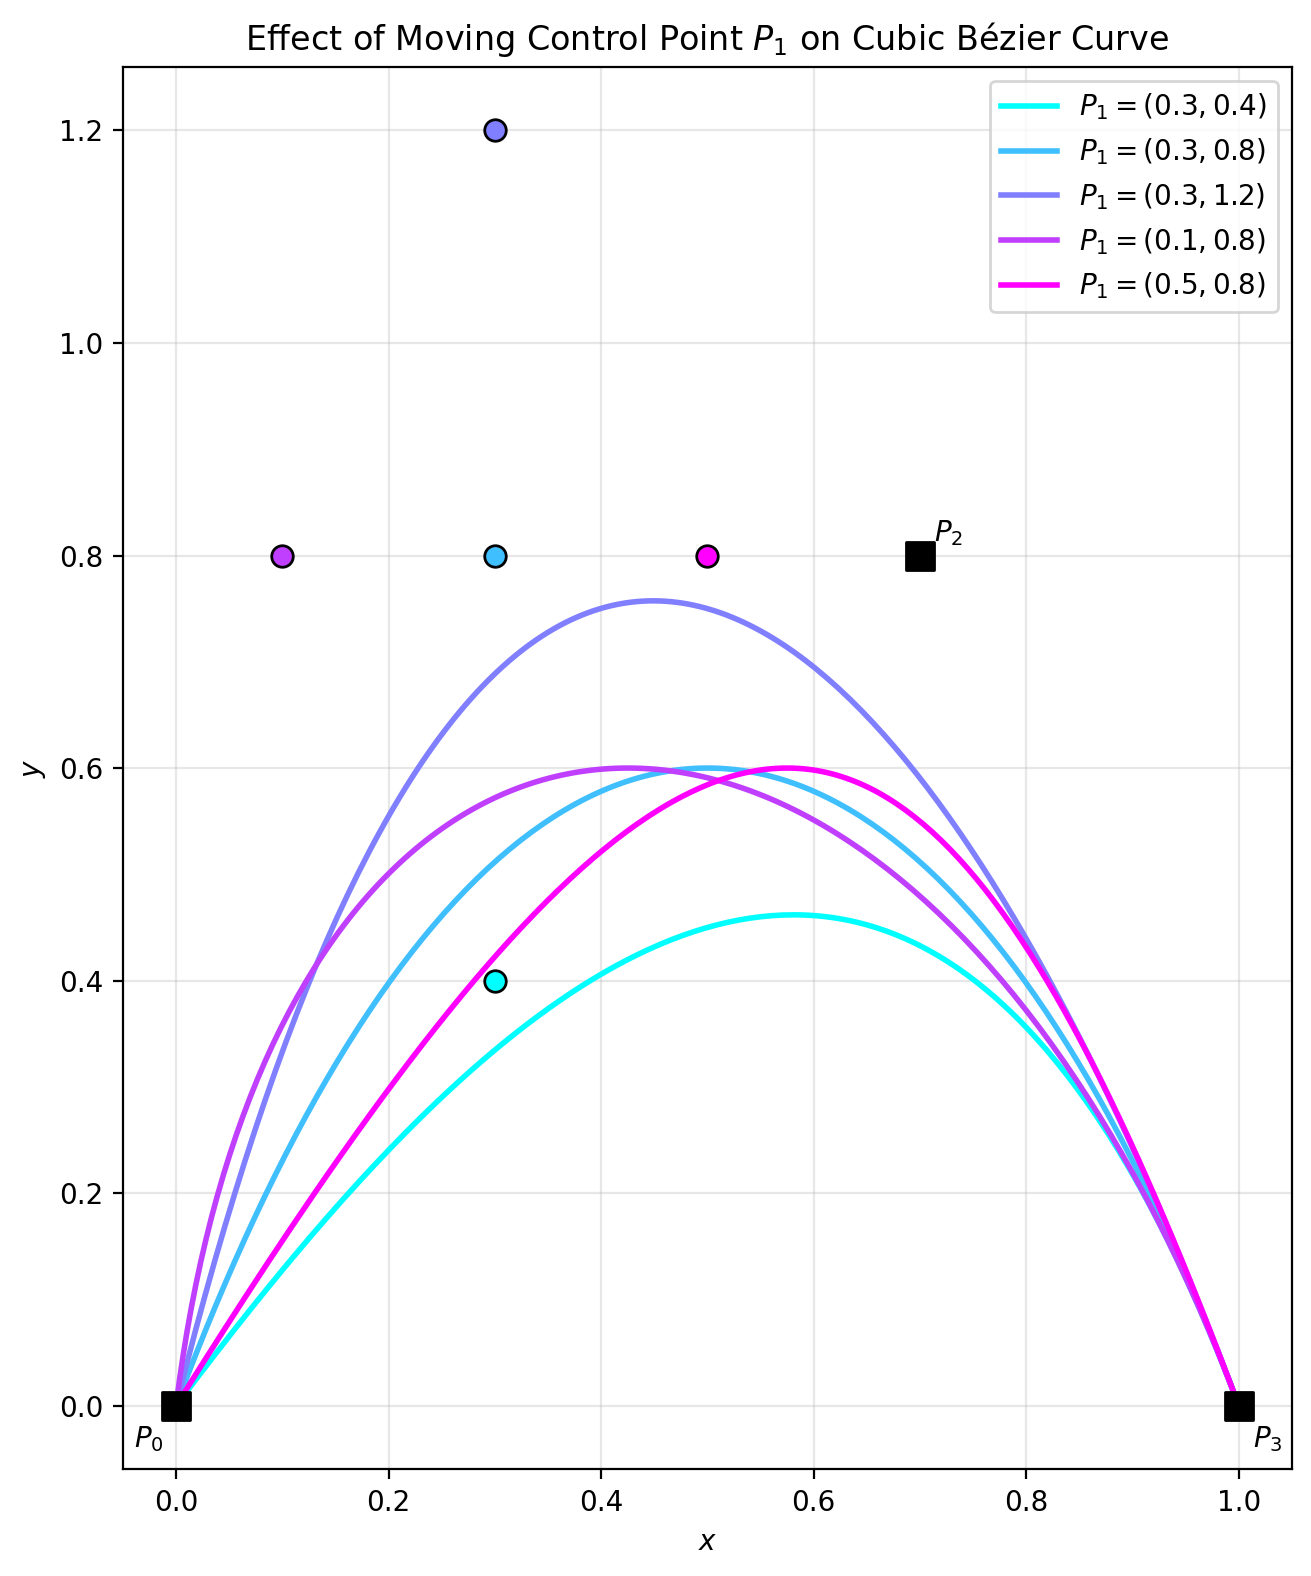

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Base control points for a cubic curve
base_cp = np.array([[0, 0], [0.3, 0.8], [0.7, 0.8], [1, 0]])

# Variations of P1 (second control point)
p1_variations = [
    [0.3, 0.4],
    [0.3, 0.8],
    [0.3, 1.2],
    [0.1, 0.8],
    [0.5, 0.8]
]

colors = plt.cm.cool(np.linspace(0, 1, len(p1_variations)))

for i, p1 in enumerate(p1_variations):
    cp = base_cp.copy()
    cp[1] = p1
    curve = bezier_curve(cp, 200)
    ax.plot(curve[:, 0], curve[:, 1], '-', 
           color=colors[i], 
           linewidth=2,
           label=f'$P_1 = ({p1[0]}, {p1[1]})$')
    ax.scatter([p1[0]], [p1[1]], c=[colors[i]], s=60, edgecolors='black', zorder=5)

# Plot fixed control points
ax.scatter([base_cp[0, 0], base_cp[2, 0], base_cp[3, 0]], 
          [base_cp[0, 1], base_cp[2, 1], base_cp[3, 1]], 
          c='black', s=100, zorder=5, marker='s')
ax.annotate('$P_0$', base_cp[0], xytext=(-15, -15), textcoords='offset points')
ax.annotate('$P_2$', base_cp[2], xytext=(5, 5), textcoords='offset points')
ax.annotate('$P_3$', base_cp[3], xytext=(5, -15), textcoords='offset points')

ax.set_title('Effect of Moving Control Point $P_1$ on Cubic Bézier Curve')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

## Composite Bézier Curves (Splines)

Complex shapes are created by joining multiple Bézier curves. For $C^1$ continuity at joints, the control points must be collinear.

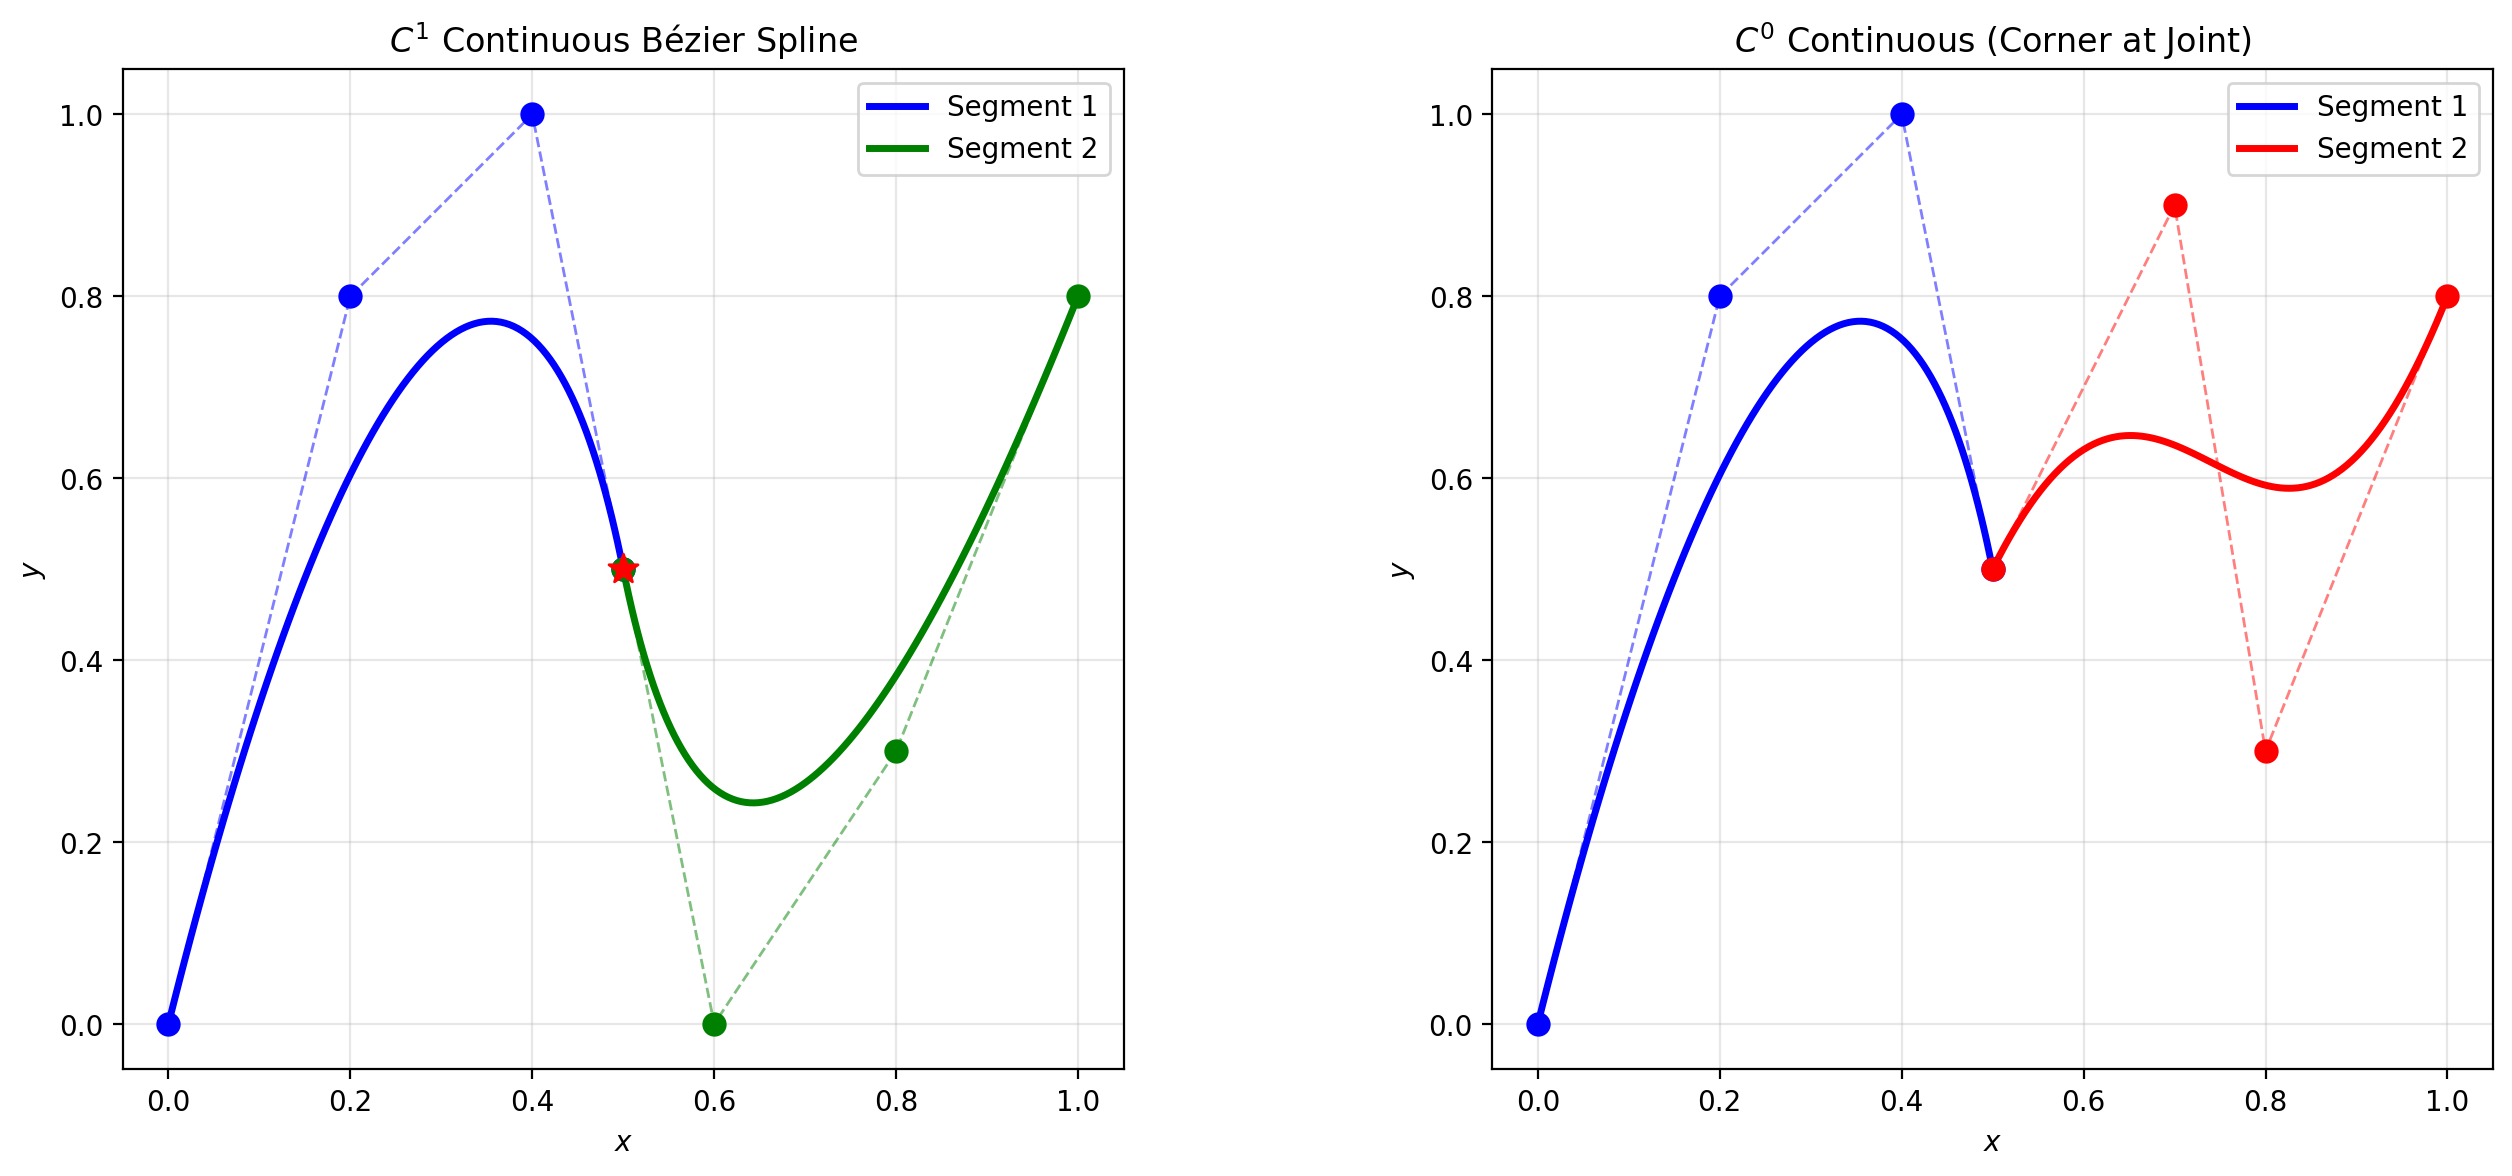

In [8]:
def bezier_spline(segments_control_points, num_points_per_segment=100):
    """
    Create a composite Bézier curve from multiple segments.
    """
    curves = []
    for cp in segments_control_points:
        curves.append(bezier_curve(cp, num_points_per_segment))
    return np.vstack(curves)


# Define two cubic Bézier segments with C1 continuity
# Segment 1: P0 to P3
seg1 = np.array([[0, 0], [0.2, 0.8], [0.4, 1.0], [0.5, 0.5]])

# For C1 continuity, the tangent at the joint must match
# P3 of seg1 = P0 of seg2, and P2 of seg1, P3 of seg1, P1 of seg2 are collinear
# Tangent direction: seg1[3] - seg1[2]
tangent = seg1[3] - seg1[2]
seg2_p1 = seg1[3] + tangent  # Continue in same direction

seg2 = np.array([seg1[3], seg2_p1, [0.8, 0.3], [1.0, 0.8]])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot C1 continuous spline
ax = axes[0]
curve1 = bezier_curve(seg1, 100)
curve2 = bezier_curve(seg2, 100)

ax.plot(curve1[:, 0], curve1[:, 1], 'b-', linewidth=2.5, label='Segment 1')
ax.plot(curve2[:, 0], curve2[:, 1], 'g-', linewidth=2.5, label='Segment 2')

# Control polygons
ax.plot(seg1[:, 0], seg1[:, 1], 'b--', alpha=0.5, linewidth=1)
ax.plot(seg2[:, 0], seg2[:, 1], 'g--', alpha=0.5, linewidth=1)

# Control points
ax.scatter(seg1[:, 0], seg1[:, 1], c='blue', s=60, zorder=5)
ax.scatter(seg2[:, 0], seg2[:, 1], c='green', s=60, zorder=5)

# Highlight joint
ax.scatter([seg1[3, 0]], [seg1[3, 1]], c='red', s=120, zorder=6, marker='*')

ax.set_title('$C^1$ Continuous Bézier Spline')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal', adjustable='box')

# Plot non-continuous spline for comparison
ax = axes[1]
seg2_discontinuous = np.array([seg1[3], [0.7, 0.9], [0.8, 0.3], [1.0, 0.8]])

curve1 = bezier_curve(seg1, 100)
curve2_disc = bezier_curve(seg2_discontinuous, 100)

ax.plot(curve1[:, 0], curve1[:, 1], 'b-', linewidth=2.5, label='Segment 1')
ax.plot(curve2_disc[:, 0], curve2_disc[:, 1], 'r-', linewidth=2.5, label='Segment 2')

# Control polygons
ax.plot(seg1[:, 0], seg1[:, 1], 'b--', alpha=0.5, linewidth=1)
ax.plot(seg2_discontinuous[:, 0], seg2_discontinuous[:, 1], 'r--', alpha=0.5, linewidth=1)

# Control points
ax.scatter(seg1[:, 0], seg1[:, 1], c='blue', s=60, zorder=5)
ax.scatter(seg2_discontinuous[:, 0], seg2_discontinuous[:, 1], c='red', s=60, zorder=5)

ax.set_title('$C^0$ Continuous (Corner at Joint)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

## Practical Application: Drawing a Heart Shape

Let's use Bézier curves to draw a heart shape, demonstrating the practical power of these curves in vector graphics.

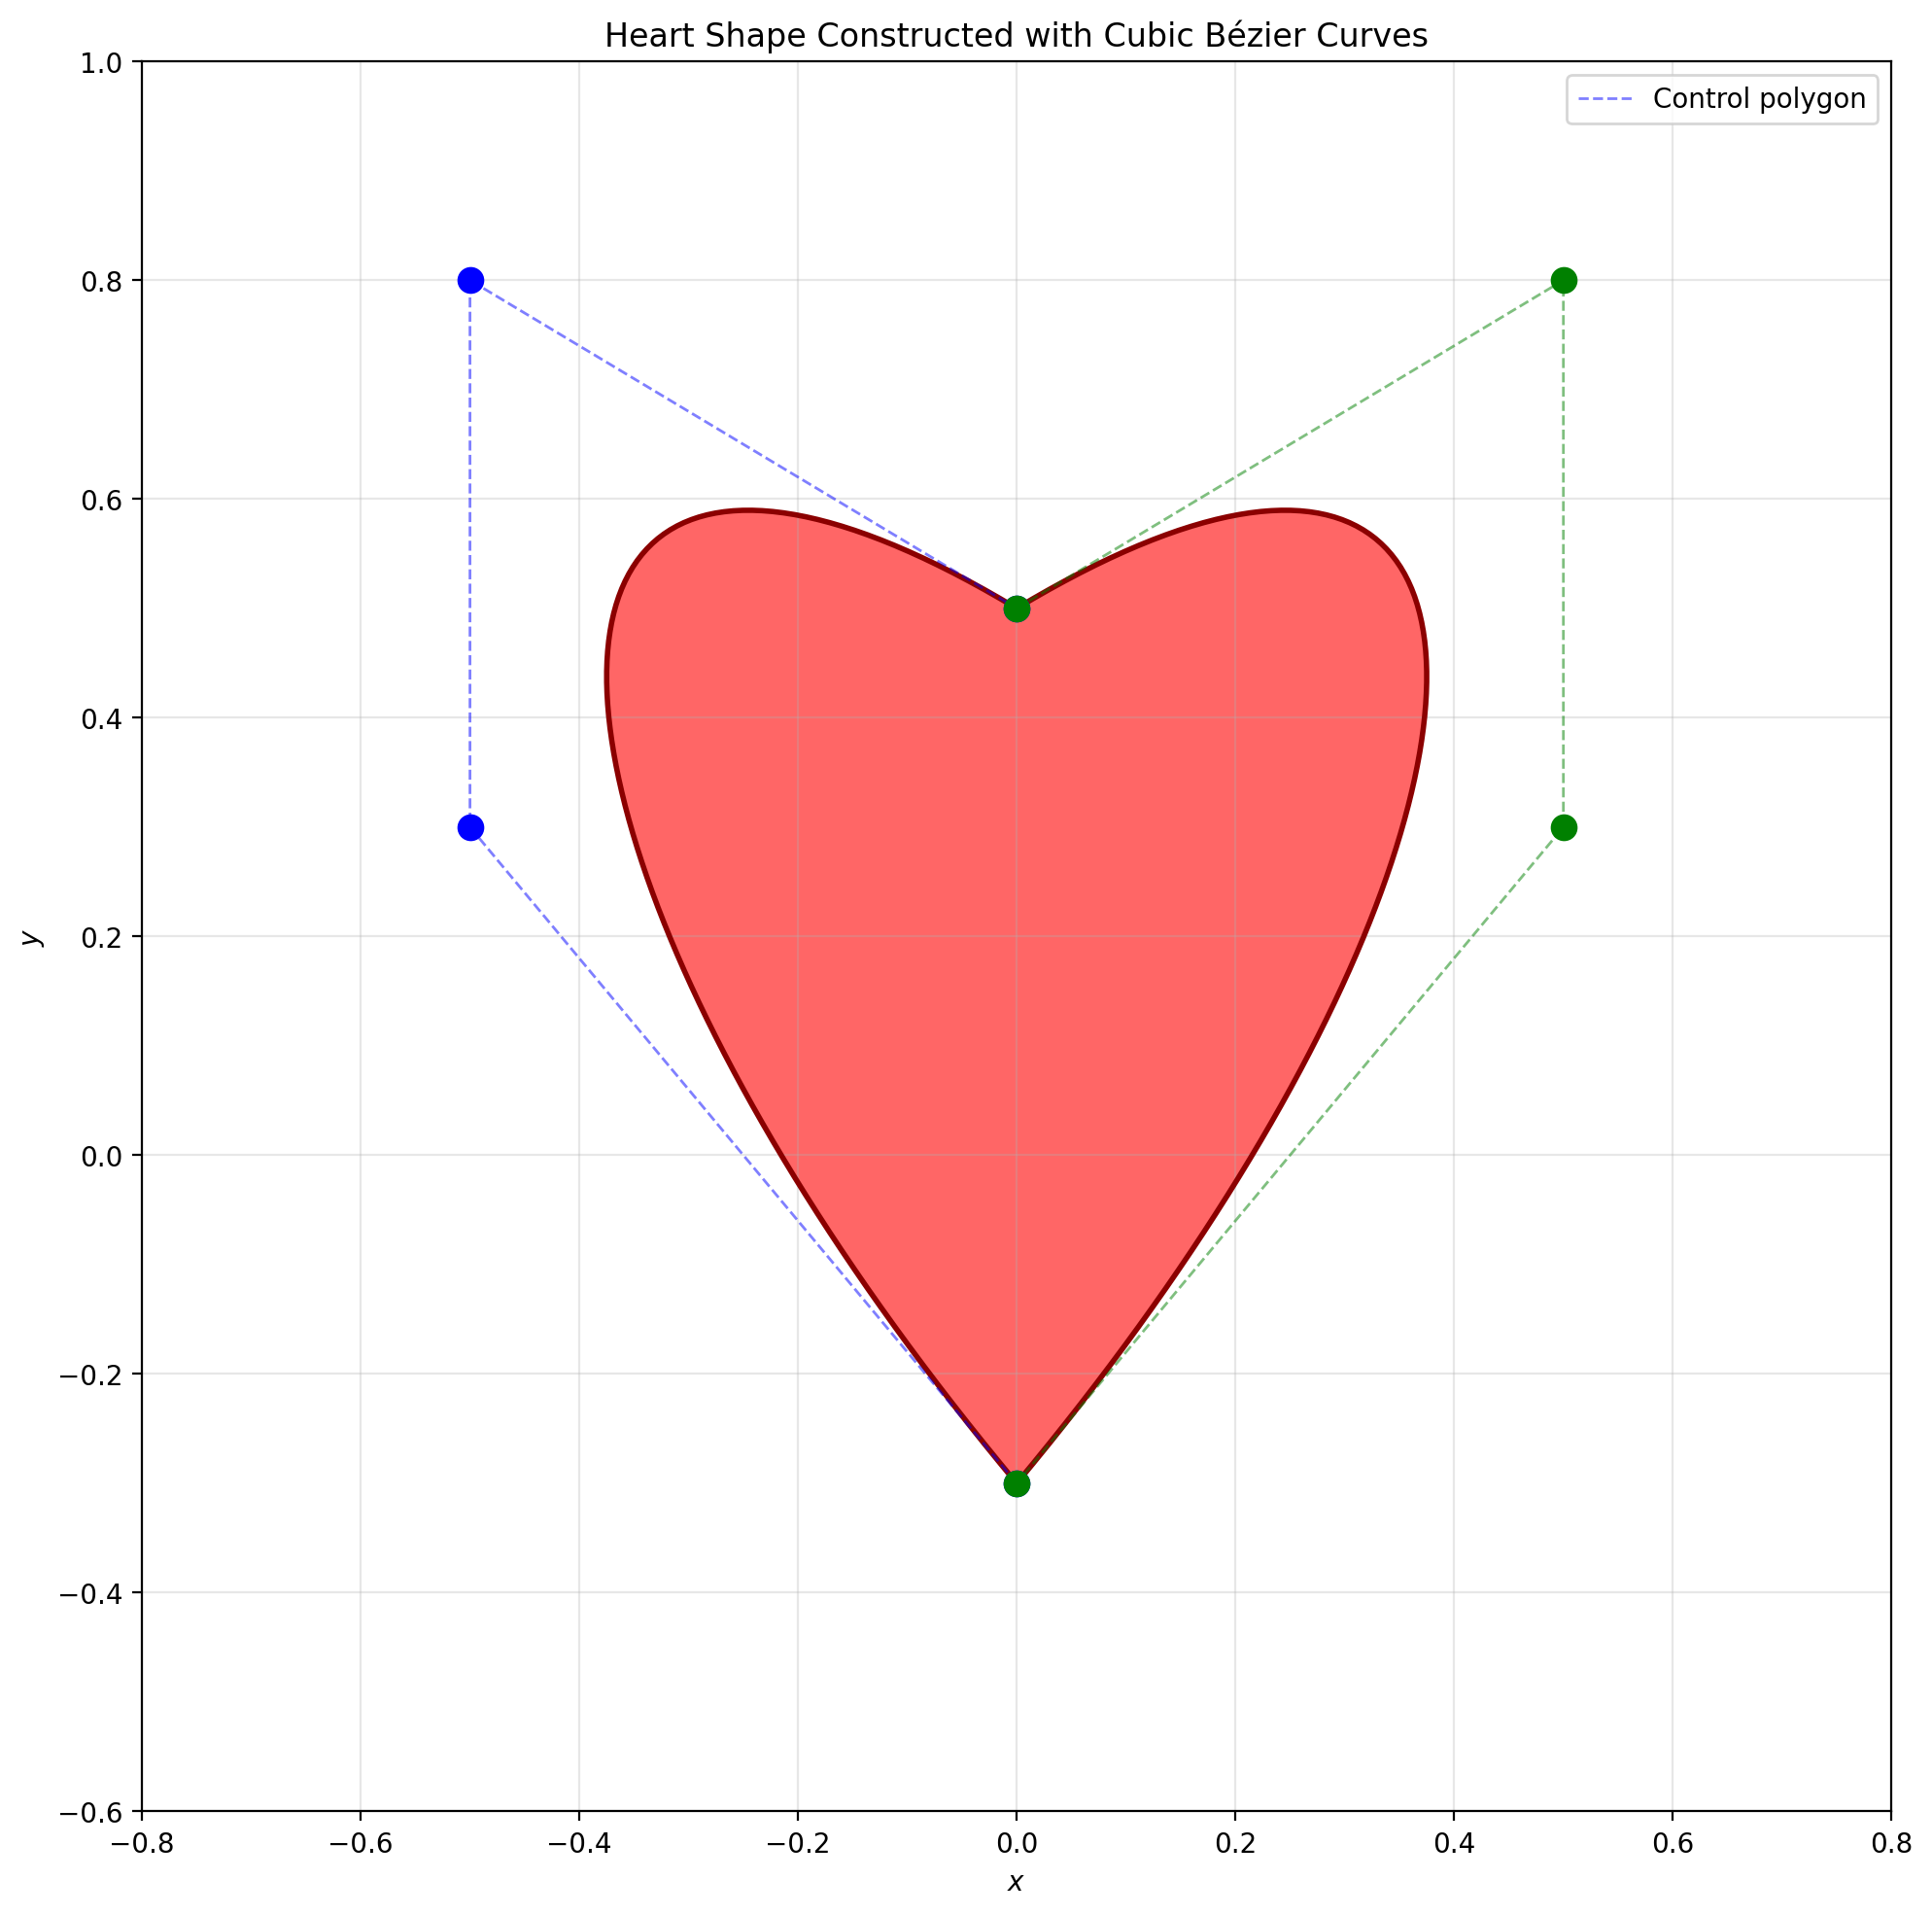

In [9]:
# Heart shape using two cubic Bézier curves
# Left side of heart
left_cp = np.array([
    [0, -0.3],      # Bottom point
    [-0.5, 0.3],    # Control point
    [-0.5, 0.8],    # Control point
    [0, 0.5]        # Top center
])

# Right side of heart (mirror of left)
right_cp = np.array([
    [0, 0.5],       # Top center
    [0.5, 0.8],     # Control point
    [0.5, 0.3],     # Control point
    [0, -0.3]       # Bottom point
])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Compute curves
left_curve = bezier_curve(left_cp, 100)
right_curve = bezier_curve(right_cp, 100)

# Combine into heart
heart = np.vstack([left_curve, right_curve])

# Fill and plot
ax.fill(heart[:, 0], heart[:, 1], 'red', alpha=0.6)
ax.plot(heart[:, 0], heart[:, 1], 'darkred', linewidth=2)

# Show control points and polygons
ax.plot(left_cp[:, 0], left_cp[:, 1], 'b--', alpha=0.5, linewidth=1, label='Control polygon')
ax.plot(right_cp[:, 0], right_cp[:, 1], 'g--', alpha=0.5, linewidth=1)
ax.scatter(left_cp[:, 0], left_cp[:, 1], c='blue', s=80, zorder=5)
ax.scatter(right_cp[:, 0], right_cp[:, 1], c='green', s=80, zorder=5)

ax.set_title('Heart Shape Constructed with Cubic Bézier Curves')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-0.8, 0.8)
ax.set_ylim(-0.6, 1.0)

plt.tight_layout()
plt.show()

## Rational Bézier Curves

Rational Bézier curves extend standard Bézier curves by introducing weights, allowing exact representation of conic sections (circles, ellipses, parabolas, hyperbolas).

$$\mathbf{B}(t) = \frac{\sum_{i=0}^{n} w_i B_{i,n}(t) \mathbf{P}_i}{\sum_{i=0}^{n} w_i B_{i,n}(t)}$$

where $w_i$ are the weights associated with each control point.

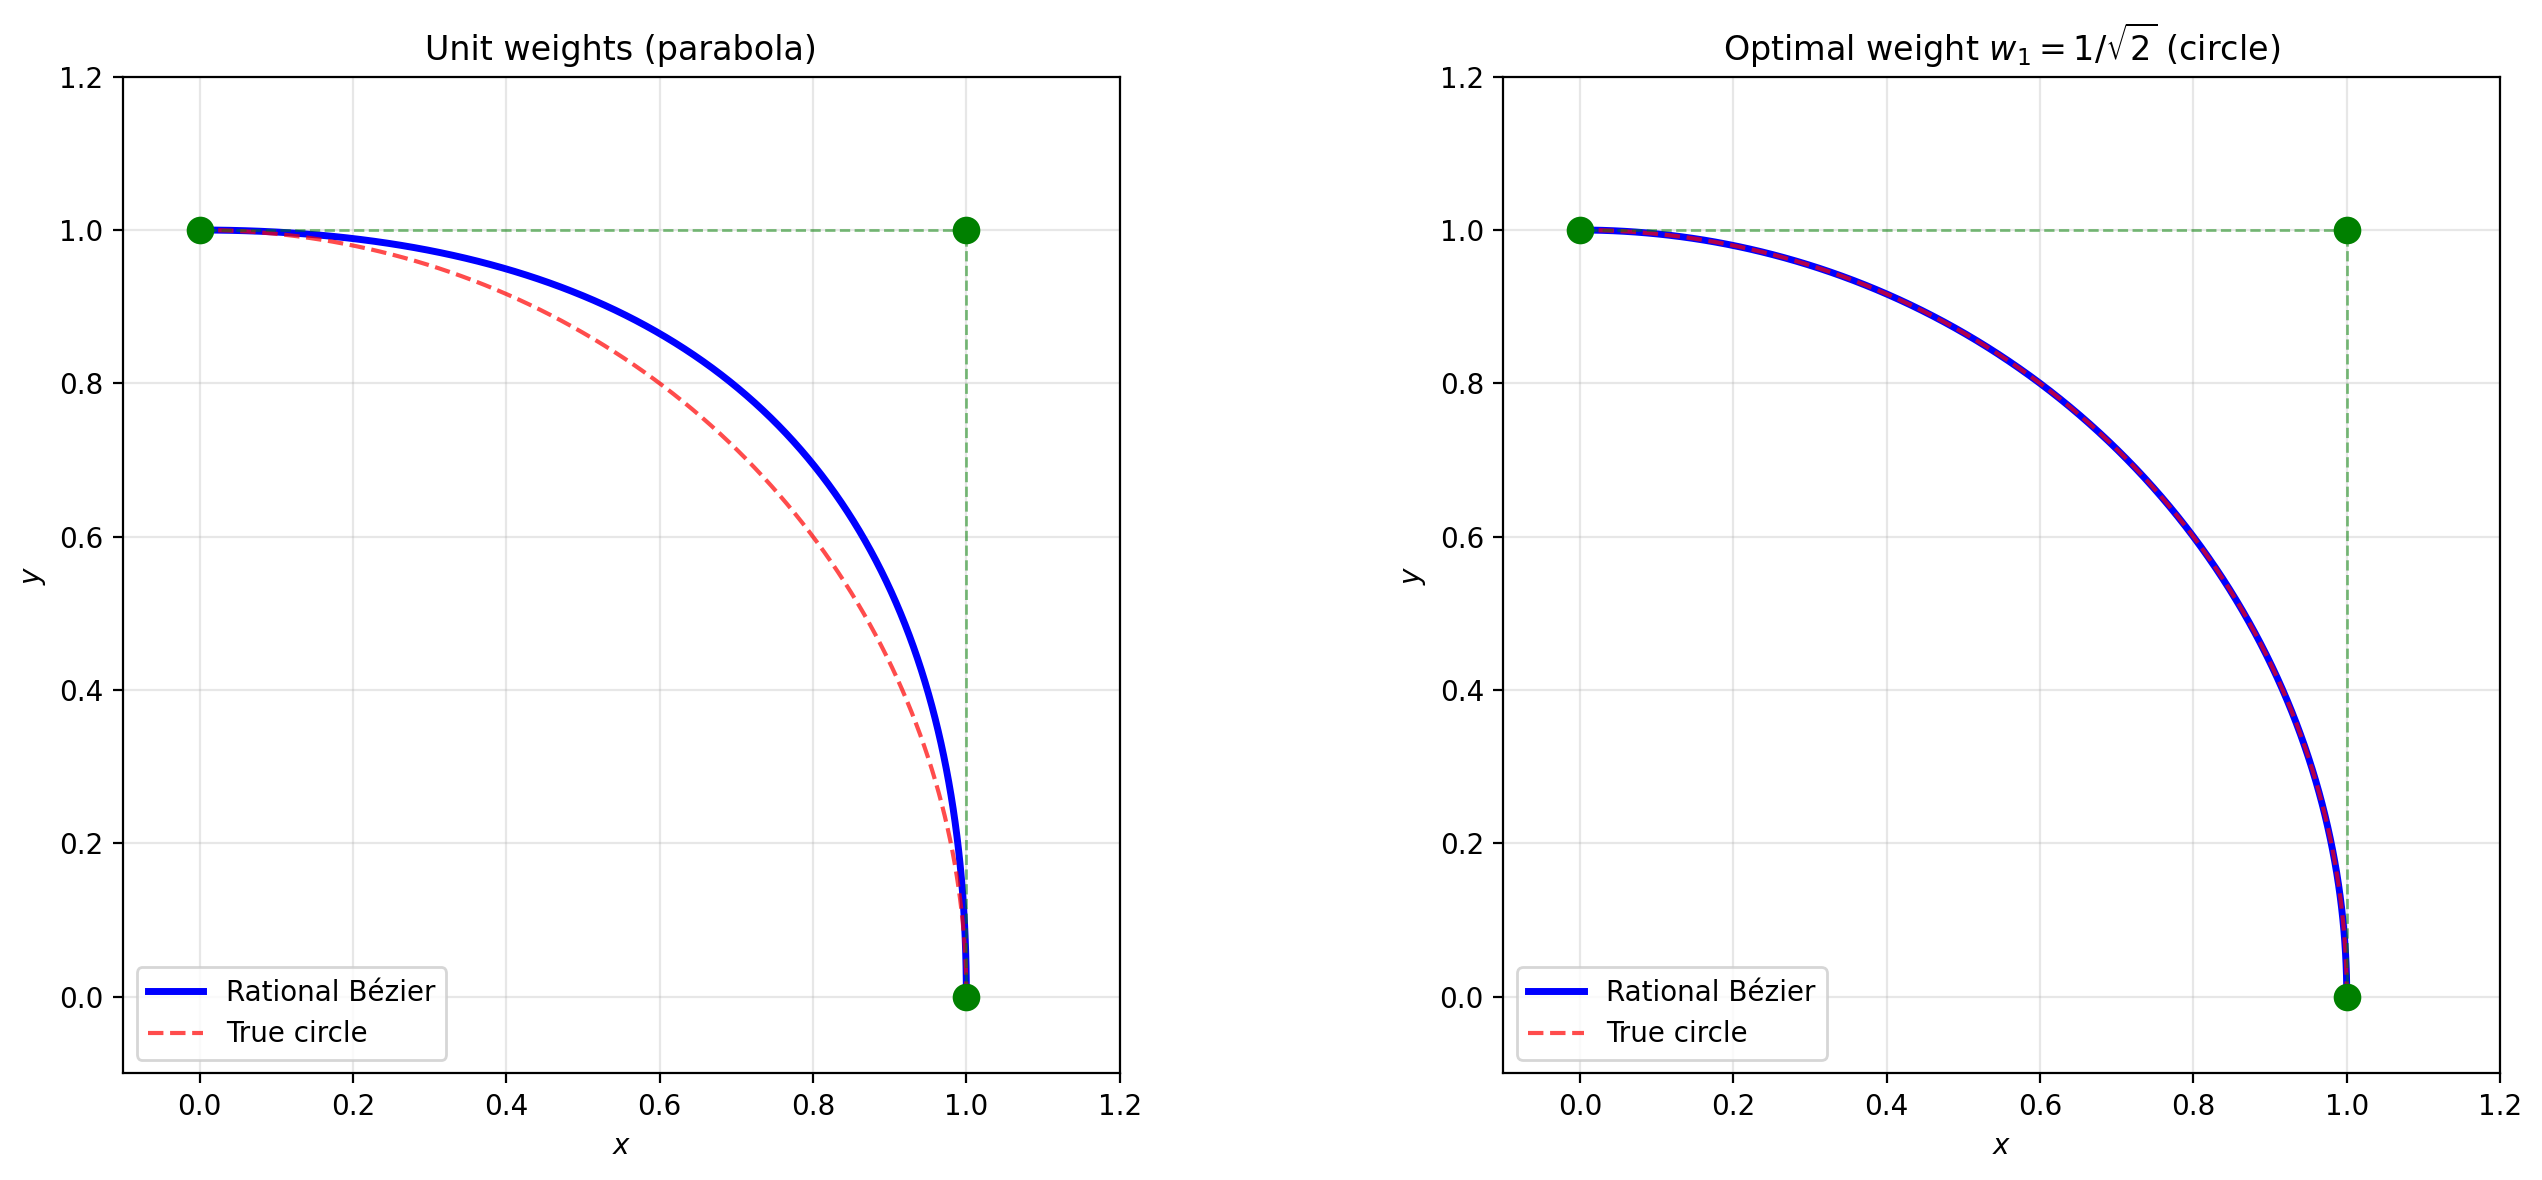

In [10]:
def rational_bezier_curve(control_points, weights, num_points=100):
    """
    Compute a rational Bézier curve.
    
    Parameters:
    -----------
    control_points : array-like, shape (n+1, 2)
        Control points
    weights : array-like, shape (n+1,)
        Weights for each control point
    num_points : int
        Number of points on the curve
    
    Returns:
    --------
    ndarray, shape (num_points, 2)
        Points on the rational Bézier curve
    """
    control_points = np.array(control_points)
    weights = np.array(weights)
    n = len(control_points) - 1
    t = np.linspace(0, 1, num_points)
    
    # Compute weighted sum
    numerator = np.zeros((num_points, 2))
    denominator = np.zeros(num_points)
    
    for i in range(n + 1):
        b = bernstein_poly(i, n, t)
        numerator += np.outer(weights[i] * b, control_points[i])
        denominator += weights[i] * b
    
    return numerator / denominator[:, np.newaxis]


# Draw a circular arc using rational quadratic Bézier
# For a 90-degree arc, the middle weight should be 1/sqrt(2)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Control points for quarter circle
cp_arc = np.array([[1, 0], [1, 1], [0, 1]])

# Different weight values
weight_sets = [
    ([1, 1, 1], 'Unit weights (parabola)'),
    ([1, 1/np.sqrt(2), 1], 'Optimal weight $w_1 = 1/\\sqrt{2}$ (circle)')
]

for ax, (weights, title) in zip(axes, weight_sets):
    curve = rational_bezier_curve(cp_arc, weights, 100)
    ax.plot(curve[:, 0], curve[:, 1], 'b-', linewidth=2.5, label='Rational Bézier')
    
    # True circle arc for comparison
    theta = np.linspace(0, np.pi/2, 100)
    ax.plot(np.cos(theta), np.sin(theta), 'r--', linewidth=1.5, alpha=0.7, label='True circle')
    
    # Control polygon
    ax.plot(cp_arc[:, 0], cp_arc[:, 1], 'g--', alpha=0.5, linewidth=1)
    ax.scatter(cp_arc[:, 0], cp_arc[:, 1], c='green', s=80, zorder=5)
    
    ax.set_title(title)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.legend(loc='lower left')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-0.1, 1.2)
    ax.set_ylim(-0.1, 1.2)

plt.tight_layout()
plt.show()

## Final Comprehensive Visualization

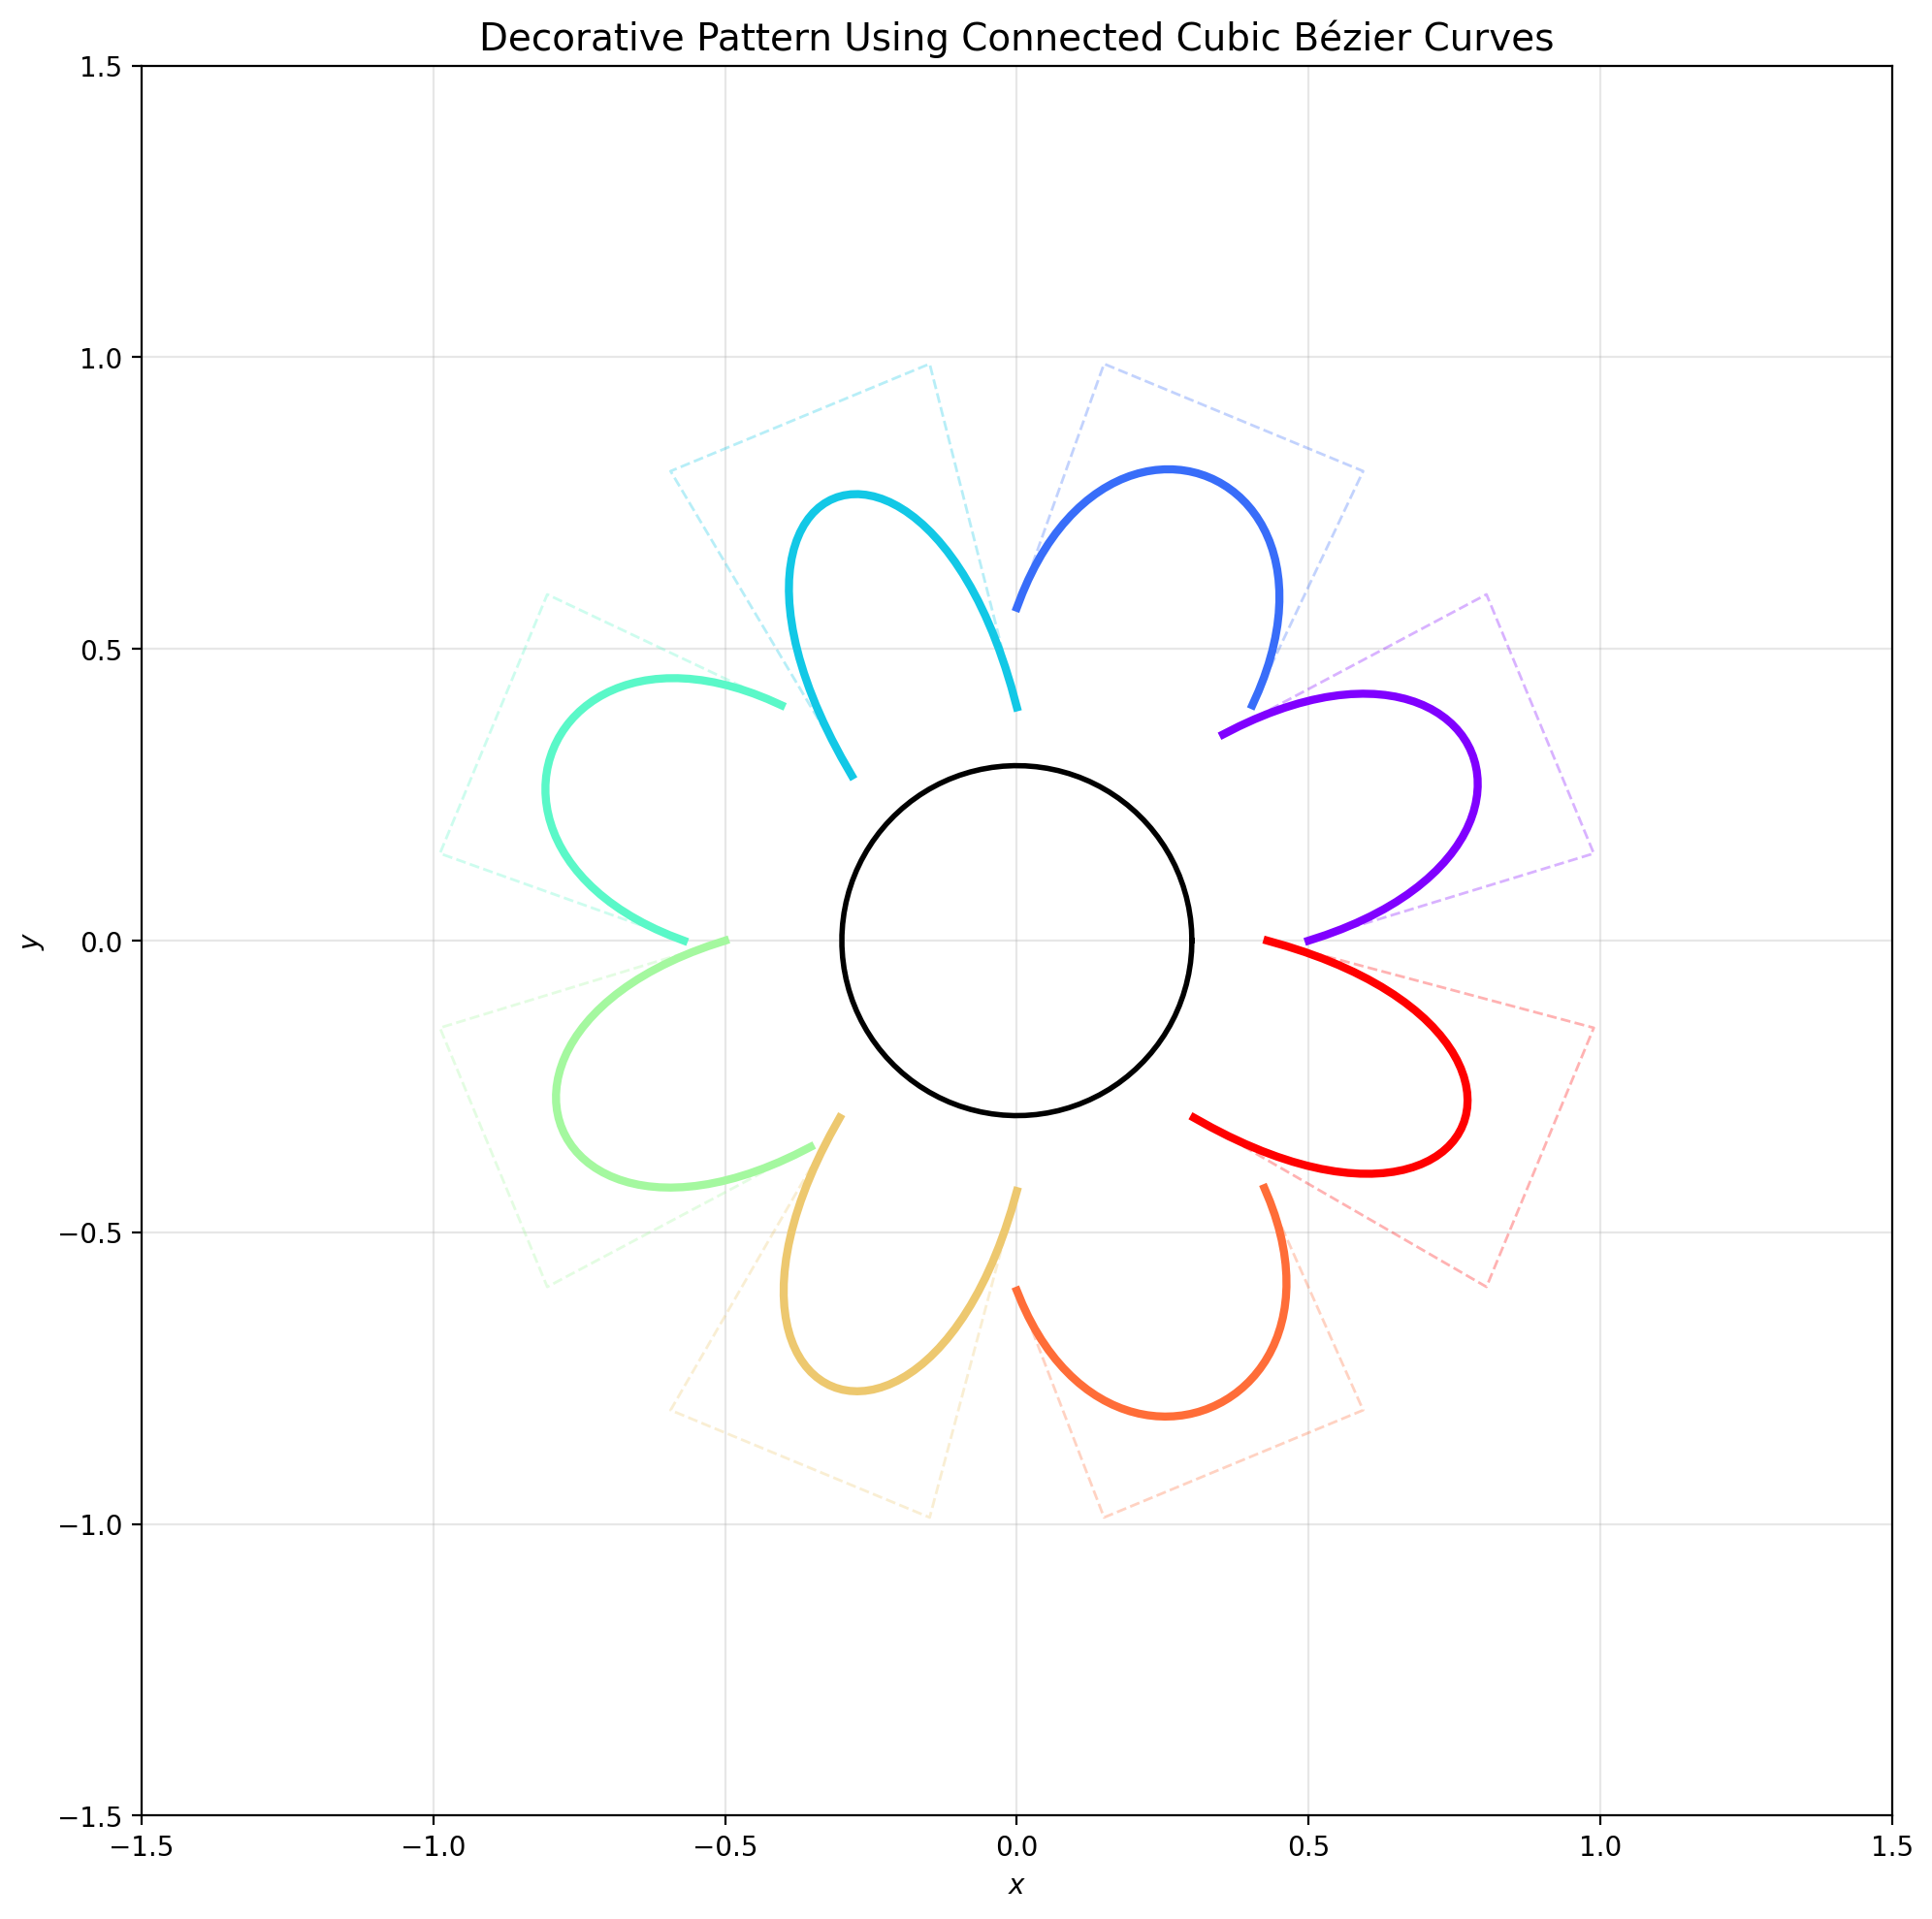

Plot saved to 'plot.png'


In [11]:
fig = plt.figure(figsize=(14, 10))

# Create a more complex shape using Bézier curves
ax = fig.add_subplot(111)

# Define multiple Bézier curve segments to create a decorative pattern
np.random.seed(42)

# Spiral-like pattern with connected cubic Bézier curves
n_segments = 8
center = np.array([0, 0])
all_curves = []
all_control_points = []

for i in range(n_segments):
    angle_start = 2 * np.pi * i / n_segments
    angle_end = 2 * np.pi * (i + 1) / n_segments
    
    r_inner = 0.5 + 0.1 * np.sin(3 * angle_start)
    r_outer = 1.0 + 0.2 * np.sin(4 * angle_start)
    
    p0 = center + r_inner * np.array([np.cos(angle_start), np.sin(angle_start)])
    p3 = center + r_inner * np.array([np.cos(angle_end), np.sin(angle_end)])
    
    # Control points push outward
    angle_mid = (angle_start + angle_end) / 2
    p1 = center + r_outer * np.array([np.cos(angle_start + 0.15), np.sin(angle_start + 0.15)])
    p2 = center + r_outer * np.array([np.cos(angle_end - 0.15), np.sin(angle_end - 0.15)])
    
    cp = np.array([p0, p1, p2, p3])
    curve = bezier_curve(cp, 50)
    all_curves.append(curve)
    all_control_points.append(cp)

# Plot all segments
colors = plt.cm.rainbow(np.linspace(0, 1, n_segments))
for i, (curve, cp) in enumerate(zip(all_curves, all_control_points)):
    ax.plot(curve[:, 0], curve[:, 1], '-', color=colors[i], linewidth=3)
    ax.plot(cp[:, 0], cp[:, 1], '--', color=colors[i], alpha=0.3, linewidth=1)

# Add inner circle
theta = np.linspace(0, 2*np.pi, 100)
ax.plot(0.3 * np.cos(theta), 0.3 * np.sin(theta), 'k-', linewidth=2)

ax.set_title('Decorative Pattern Using Connected Cubic Bézier Curves', fontsize=14)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

plt.tight_layout()

# Save the figure
plt.savefig('bezier_curve_drawing_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to 'plot.png'")

## Summary

This notebook has explored Bézier curves from mathematical foundations to practical implementation:

1. **Mathematical Framework**: Bernstein polynomials form the basis, with curves defined as weighted sums of control points.

2. **De Casteljau's Algorithm**: A numerically stable recursive method for curve evaluation.

3. **Curve Properties**: Endpoint interpolation, tangent behavior, convex hull containment, and affine invariance.

4. **Control Point Manipulation**: Intuitive shape control through point movement.

5. **Composite Curves**: Creating complex shapes through $C^0$, $C^1$, or $C^2$ continuous splines.

6. **Rational Bézier Curves**: Extending to exact conic section representation.

Bézier curves remain fundamental in computer graphics, font design (TrueType, PostScript), CAD systems, and animation paths due to their mathematical elegance and intuitive controllability.